<a href="https://colab.research.google.com/github/FlorenciaGobbi/PortfolioProjects/blob/main/Social_Netsowk_Adds_KNN_SVM_LDA_LQA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Netsowk Adds: KNN, SVM, LDA-LQA**

Social network ads es un conjunto de datos categóricos para determinar si un usuario compró un producto en particular a partir de datos como el género, la edad y el salario estimado.

Comenzaremos con un Análisis Exploratorio para conocer los patrones, detectar anomalías, valores nulos, correlaciones, reconocer errores y eliminar irregularidades y valores innecesarios de los datos.

Utilizaremos los modelos de clasificación KNN, SVM y LDA-LQA para probar la hipótesis, analizar los modelos y elegir los mejores para predecir si un cliente específico comprará o no el producto.



In [ ]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import svm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #ajuste de hiperparámetros

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CArga del dataset
dataset = pd.read_csv('/content/drive/MyDrive/Diplomatura DS/Python/Datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Observación del dataset
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
# Cantidad de clases
dataset['Purchased'].nunique()

2

In [ ]:
# Se eliminan los datos duplicados
dataset.info()
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.8+ KB


In [ ]:
#  Se buscan datos nulos. En este caso no hay.
dataset.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
print(sum(dataset.isna().sum()))
print(sum(dataset.isnull().sum()))

0
0


In [ ]:
# Tipo de datos de las columnas.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.8+ KB
None


In [ ]:
# Nombre de las columnas
print(dataset.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [ ]:
# Se elimina la columna User Id
dataset=dataset.drop(columns='User ID')
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
# Resumen estadístico
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


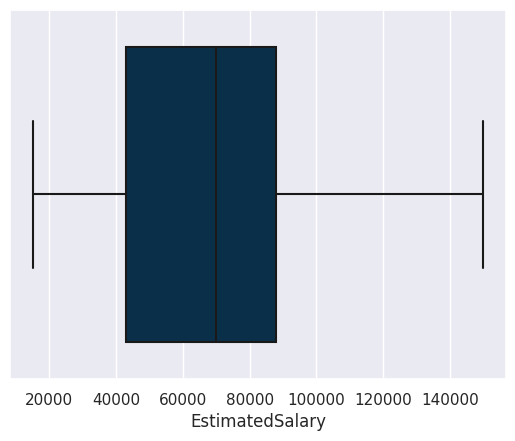

In [ ]:
# Se buscan outliers. E este caso no se detectaron valores anómalos
sns.set(style="darkgrid")
sns.boxplot(x=dataset['EstimatedSalary'], color="#003153")
medianprops = dict(linestyle='-', linewidth=1, color='black')
plt.show()


<Axes: xlabel='Purchased', ylabel='count'>

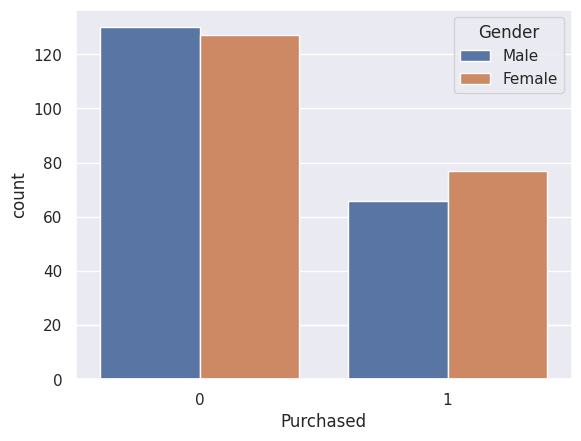

In [ ]:
# Visualización de la relación entre Compras y Género
sns.countplot(x=dataset['Purchased'],hue='Gender',data=dataset)

<ipython-input-173-07f78561e7c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = dataset.corr()


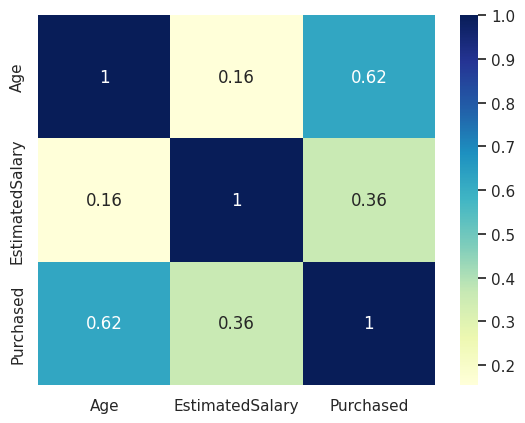

In [ ]:
# Correlación entre las variables
c = dataset.corr()
sns.heatmap(c,cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
# Se transforma la variable Género en una variable numérica. 0=Female, 1=Male
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset["Gender"] = le.fit_transform(dataset["Gender"])
dataset['Gender'].unique()

array([1, 0])

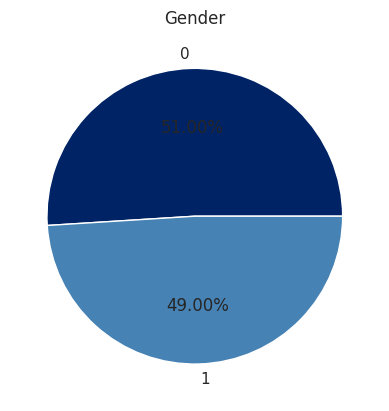

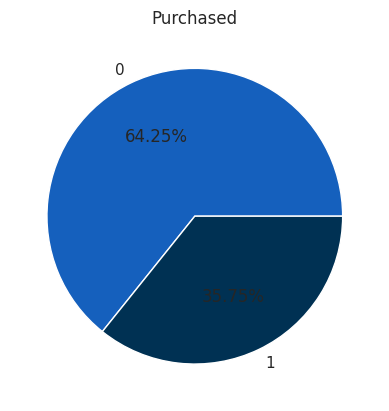

In [ ]:
# Se verifica el equilibrio de los datos.
labels = dataset['Gender'].value_counts().index
sizes = dataset['Gender'].value_counts()
colores = ['#002366','#4682B4']
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colores)
plt.title('Gender')
plt.show()

labels = dataset['Purchased'].value_counts().index
sizes = dataset['Purchased'].value_counts()
colores = ['#1560BD', '#003153']
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colores)
plt.title('Purchased')
plt.show()


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 15.6 KB


In [ ]:
# Selección de variables
X = dataset.drop('Purchased', axis=1)
y = dataset.Purchased

In [ ]:
# Balanceo de los datos con SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Forma de X antes de aplicar SMOTE: {X.shape}
Forma de X antes de aplicar SMOTE: {X_sm.shape}''')

print('\nEquilibrio de clases positivas y negativas. (%):')
y_sm.value_counts(normalize=True) * 100

Forma de X antes de aplicar SMOTE: (400, 3)
Forma de X antes de aplicar SMOTE: (514, 3)

Equilibrio de clases positivas y negativas. (%):


0    50.0
1    50.0
Name: Purchased, dtype: float64

In [ ]:
# Normalización del dataset
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import make_pipeline

Norm = make_pipeline(MinMaxScaler(), Normalizer())
X=Norm.fit_transform(X)

In [ ]:
# Se divide el dataset en training y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

In [ ]:
# Se verifica cuántos datos quedan para el entrenamiento y cuántos para la prueba
print(X_train.shape)
print(X_test.shape)

(300, 3)
(100, 3)


KNN

In [ ]:
# Entrenamento con KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Comparación de la tasa de error con el valor K para ver el mejor
error = []

#Calculando error para K entre 1 y 40
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Medio')

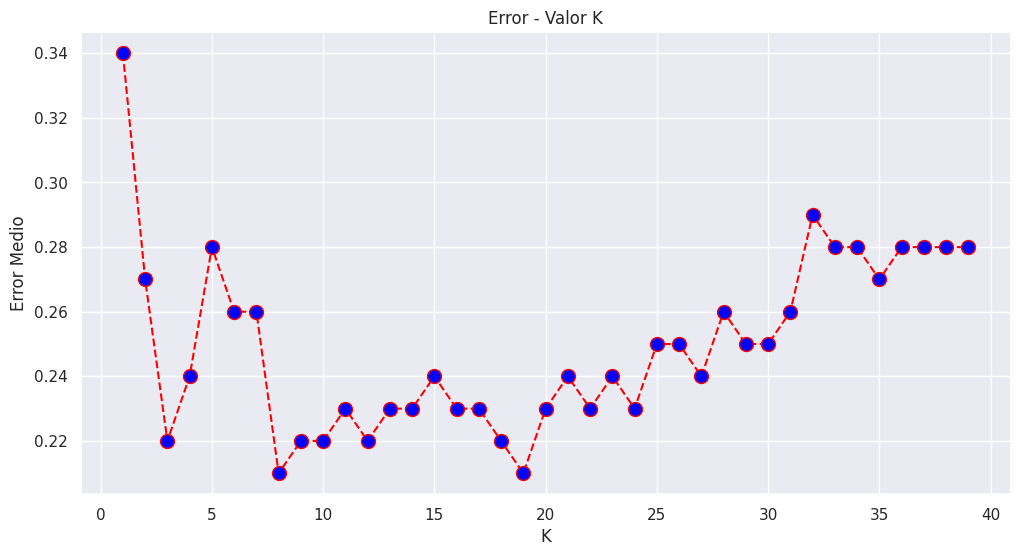

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error - Valor K')
plt.xlabel('K')
plt.ylabel('Error Medio')

En 6 da más bajo error

In [ ]:
# Vlor de k
k = 6

In [ ]:
# Predicción del conjunto de prueba
y_pred = classifier.predict(X_test)

In [ ]:
# Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[51, 19],
       [10, 20]])

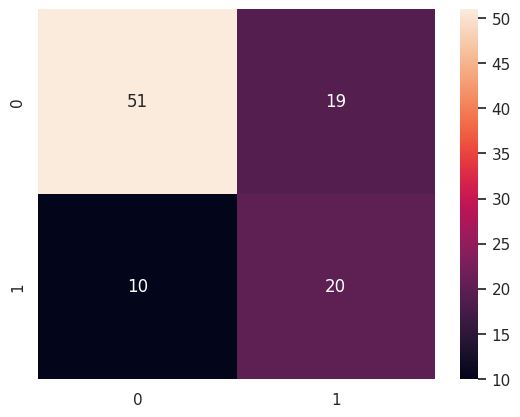

In [ ]:
sns.color_palette('icefire')
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

51 (de 0) y 20 (de 1) Aciertos

10 (de 1) y 19 (de 0) Desaciertos

In [ ]:
# Exactitud - La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.71

In [ ]:
# Precision - Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
#Responde a la pregunta ¿qué porcentaje de lo identificado como positivo es realmente correcto?

from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.5128205128205128

In [ ]:
# Recall - ¿Qué porcentaje de los valores positivos fueron bien identificados?

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.6666666666666666

In [ ]:
# Rendimiento combinado de la precisión y la sensibilidad

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5797101449275363

In [ ]:
# Reporte total de las mérticas

from sklearn.metrics import classification_report
reporte = classification_report (y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        70
           1       0.51      0.67      0.58        30

    accuracy                           0.71       100
   macro avg       0.67      0.70      0.68       100
weighted avg       0.74      0.71      0.72       100



LDA y QDA: Comparativas de Clasificación

In [ ]:
clf_lda = lda() # creo instancia del clasifificador LDA
clf_qda = qda() # creo instancia del clasificador QDA

clf_lda.fit(X_train,y_train) #entreno los clasificadores con los valores de los parametrso por default
clf_qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [ ]:
#hacemos algunas predicciones a ver como se comportó el modelo
#Predicción en el conjunto de prueba
predict_lda = clf_lda.predict(X_test)
print('Accuracy LDA :', clf_lda.score(X_test, y_test))
predict_qda = clf_qda.predict(X_test)
print('Accuracy QDA:', clf_qda.score(X_test,y_test))

Accuracy LDA : 0.54
Accuracy QDA: 0.69


In [ ]:
#optimizo los parametros
#solver{‘svd’, ‘lsqr’, ‘eigen’}
clf_lda_rs = GridSearchCV(lda(), {
        'solver': ['svd','lsqr','eigen']
    },
    cv=5,
    return_train_score=False

)
clf_lda_rs.fit(X_train, y_train)
df_rs = pd.DataFrame(clf_lda_rs.cv_results_)[['rank_test_score','mean_test_score','mean_fit_time','params']]
print(pd.DataFrame(clf_lda_rs.cv_results_))


   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0       0.002412      0.001316         0.000845        0.000061          svd   
1       0.001416      0.000032         0.001132        0.000456         lsqr   
2       0.001558      0.000092         0.000841        0.000135        eigen   

                params  split0_test_score  split1_test_score  \
0    {'solver': 'svd'}           0.616667           0.616667   
1   {'solver': 'lsqr'}           0.616667           0.616667   
2  {'solver': 'eigen'}           0.616667           0.616667   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.716667           0.666667           0.566667         0.636667   
1           0.716667           0.666667           0.566667         0.636667   
2           0.716667           0.666667           0.566667         0.636667   

   std_test_score  rank_test_score  
0         0.05099                1  
1         0.05099              

In [ ]:
# cuales serán los mejores parámetros?
clf_lda_rs.best_params_

{'solver': 'svd'}

In [ ]:
print(df_rs.sort_values(by= ['rank_test_score','mean_test_score'], ascending = False))

   rank_test_score  mean_test_score  mean_fit_time               params
0                1         0.636667       0.002412    {'solver': 'svd'}
1                1         0.636667       0.001416   {'solver': 'lsqr'}
2                1         0.636667       0.001558  {'solver': 'eigen'}


SVM: Comparativas de Clasificación con/sin optimización de parámetros.

Clasificación de SVM Sin Optimización de Parámetros

In [ ]:
clf_svm= svm.SVC(C= 1, kernel='poly') #creo una instancia de  la clase

In [ ]:
clf_svm =clf_svm.fit(X_train,y_train)

In [ ]:
#Predicción en el conjunto de prueba
predict = clf_svm.predict(X_test)
print('Accuracy :', clf_svm.score(X_test, y_test))

Accuracy : 0.8


Clasificación con SVM con optimización de parámetros

GridSearchCV

In [ ]:
clf_svm_gridscv =  GridSearchCV(svm.SVC(), {
    'C': [1,10,20],
    'kernel': ['rbf','linear','poly']
}, cv=2, return_train_score=False)

clf_svm_gridscv.fit(X_train, y_train)
clf_svm_gridscv.cv_results_


{'mean_fit_time': array([0.0032618 , 0.00255144, 0.00196779, 0.00190055, 0.00259233,
        0.00326574, 0.00199592, 0.00179076, 0.00352502]),
 'std_fit_time': array([7.55548477e-04, 1.15633011e-05, 7.28368759e-05, 9.35792923e-05,
        1.37329102e-04, 1.37090683e-05, 1.11460686e-04, 7.62939453e-06,
        5.98192215e-04]),
 'mean_score_time': array([0.00223744, 0.00126004, 0.00107074, 0.00194466, 0.0018326 ,
        0.00141776, 0.00136685, 0.00113511, 0.00111175]),
 'std_score_time': array([4.98890877e-04, 1.19209290e-06, 6.91413879e-06, 5.77807426e-04,
        9.33408737e-05, 2.05874443e-04, 1.19209290e-06, 2.38418579e-07,
        2.21729279e-05]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'poly', 'rbf', 'linear', 'poly',
                    'rbf', 'lin

In [ ]:
# Resultado en un dataframe
df_grid = pd.DataFrame.from_dict(clf_svm_gridscv.cv_results_,orient = "columns")
print(df_grid)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.003262      0.000756         0.002237    4.988909e-04       1   
1       0.002551      0.000012         0.001260    1.192093e-06       1   
2       0.001968      0.000073         0.001071    6.914139e-06       1   
3       0.001901      0.000094         0.001945    5.778074e-04      10   
4       0.002592      0.000137         0.001833    9.334087e-05      10   
5       0.003266      0.000014         0.001418    2.058744e-04      10   
6       0.001996      0.000111         0.001367    1.192093e-06      20   
7       0.001791      0.000008         0.001135    2.384186e-07      20   
8       0.003525      0.000598         0.001112    2.217293e-05      20   

  param_kernel                         params  split0_test_score  \
0          rbf      {'C': 1, 'kernel': 'rbf'}           0.780000   
1       linear   {'C': 1, 'kernel': 'linear'}           0.653333   
2         poly     {'C': 1, 'kernel': 'poly'}

In [ ]:
pd.DataFrame(clf_svm_gridscv.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.793333
1,1,linear,0.636667
2,1,poly,0.783333
3,10,rbf,0.790000
4,10,linear,0.613333
5,10,poly,0.786667
6,20,rbf,0.786667
7,20,linear,0.606667
8,20,poly,0.786667


In [ ]:
# cuales serán los mejores parámetros?
clf_svm_gridscv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
clf_svm_gridscv.best_estimator_

SVC(C=1)

RandomizedSearchCV

In [ ]:
clf_svm_rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': list(range(1,100)),
        'kernel': ['poly','rbf','linear']
    },
    cv=5,
    return_train_score=False,
    n_iter=10
)
clf_svm_rs.fit(X_train, y_train)
df_rs = pd.DataFrame(clf_svm_rs.cv_results_)[['param_C','param_kernel','mean_test_score']]
print(df_rs.sort_values(by= 'mean_test_score', ascending = False))


  param_C param_kernel  mean_test_score
0      79         poly         0.783333
1      82         poly         0.783333
9      88          rbf         0.783333
4      67         poly         0.780000
7      55          rbf         0.780000
8      56          rbf         0.780000
2      17         poly         0.746667
3      40       linear         0.596667
5      76       linear         0.596667
6      92       linear         0.596667
